# Project 1

Proposal:

I propose using data from the Maryland State Employee’s salaries for the year 2018. The link for the data is https://www.baltimoresun.com/data/bal-public-salaries-archive-20150415-htmlstory.html.
I discovered the data source through the links provided to the class. The data was free and is legal to use as well. I have searched for documented data cleanup and have not found any documentation. The data has 109,103 rows, 17 columns  and is 27.1 MB. 
I understand the context of the data because my economics background has allowed me to work with datasets that have the salaries of a population and I know what potential factors can lead to varying salaries. I also have experience in working with university salary data which could be helpful because of the assumption that a portion of Maryland State employees will be from Universities. 

 Primary Observation: 
 
 This data is useful when looking at the salaries in the population of Maryland State Employees in the year 2018. Five of the seventeen columns represent different breakdowns of an employees salary. The annual salary is the expected salary an employee will be paid. Regular earnings represents the amount of money paid to date. Regular earnings and annual salary should be the same unless the employee has been hired/terminated during 2018 or took unpaid leave during the 2018. Overtime_earnings and other_earnings are used to represent earnings other than the expected salary such as overtime and trainings, respectivly. Ytd (Year to date) gross earnings is the total of the regular earnings, overtime earnings, and other earnings of that year.
The data also shows what organizations a Maryland State employee belongs too. Possible descions this data can be factored into is how budgets are allocated in regard to payroll. Not all of salaries come from budgeted money from the state. Note: Some University and Medical personel come from private sources and tuition.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the csv of the data
#use multiple dtypes which takes up memory
df = pd.read_csv("cy2018-md.csv",low_memory=False) 
#df=pd.read_csv("https://salaries.news.baltimoresun.com/salaries-be494cf/2018+Maryland+state+salaries/cy2018-md.csv",low_memory=False)

In [3]:
df.shape

(998747, 17)

In [4]:
df.head()
#found missing data 

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date,term_date
0,DANIEL,NaN,STAPLES,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,79000.0,A,34000.0,0.0,4000.0,37000.0,5/23/18,0
1,RUBEENA,NaN,ISMAIL,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,58000.0,A,13000.0,0.0,0.0,13000.0,9/12/18,0
2,NICOLE,U,BECKETTS,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,99000.0,A,99000.0,0.0,0.0,99000.0,12/10/98,0
3,ELISABETH,C,MACKEY,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,75000.0,A,75000.0,0.0,2000.0,76000.0,10/18/95,0
4,PAUL,E,SHIVELY,NaN,RG,360300.0,BALTO CITY COMMUNITY COLLEGE,360300,9004.0,90000.0,A,10000.0,0.0,0.0,10000.0,11/7/18,0


In [5]:
#find missing data
df.isnull().sum()

first_name            889672
middle_initial        912094
last_name             889676
suffix                995970
system                889645
agency                889669
organization          889645
subtitle              889645
class_code            889645
annual_salary         889645
pay_rate              889645
regular_earnings      889645
overtime_earnings     889645
other_earnings        889645
ytd_gross_earnings    889645
hire_date             889645
term_date             889645
dtype: int64

In [6]:
#checking for any data type mishaps
df.dtypes

first_name             object
middle_initial         object
last_name              object
suffix                 object
system                 object
agency                float64
organization           object
subtitle               object
class_code            float64
annual_salary         float64
pay_rate               object
regular_earnings      float64
overtime_earnings     float64
other_earnings        float64
ytd_gross_earnings    float64
hire_date              object
term_date              object
dtype: object

In [7]:
#describing floats 
df.describe()

,agency,class_code,annual_salary,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings
count,109078.000000,109102.000000,109102.000000,109102.000000,109102.000000,1.091020e+05,1.091020e+05
mean,337800.065595,3293.225688,48552.666312,44691.096405,2273.110484,2.933466e+03,4.979769e+04
std,44505.876828,2853.397614,44351.917568,44122.397519,7965.513957,1.648321e+04,4.814420e+04
min,210101.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+04,0.000000e+00
25%,321210.000000,1111.000000,20000.000000,5000.000000,0.000000,0.000000e+00,1.500000e+04
50%,360222.000000,1315.000000,46000.000000,43000.000000,0.000000,0.000000e+00,4.600000e+04
75%,360224.000000,4573.000000,65000.000000,63000.000000,0.000000,3.000000e+03,6.900000e+04
max,500224.000000,9991.000000,980000.000000,967000.000000,131000.000000,4.286000e+06,4.793000e+06


In [8]:
#describing objects in data
df.describe(include="object")

,first_name,middle_initial,last_name,suffix,system,organization,subtitle,pay_rate,hire_date,term_date
count,109075,86653,109071,2777,109102,109102,109102,109102,109102,109102
unique,20098,28,39339,9,2,74,265,3,9987,1731
top,MICHAEL,A,SMITH,JR,RG,UNIVERSITY OF MARYLAND,360222-UMCP,A,8/5/18,0
freq,1655,11065,1012,1784,59461,49641,25337,85174,1217,106050


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120c65590>]],
      dtype=object)

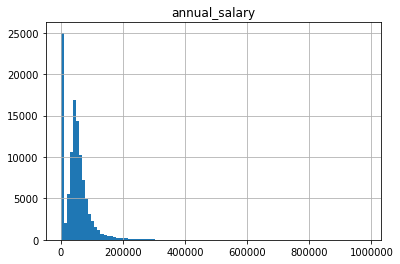

In [9]:
df.hist(column="annual_salary",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121359dd0>]],
      dtype=object)

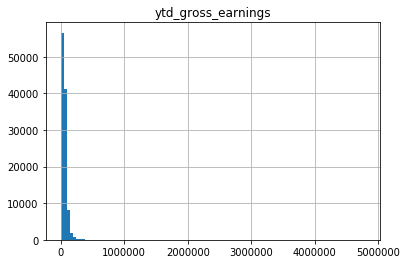

In [10]:
#checking for any irregularies in data
#multitude of 0 annual salaries
df.hist(column="ytd_gross_earnings",bins=100)

In [11]:
#exploring the extra 0s in annual_salaries
df.tail(300)

,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date,term_date
998447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Set is tidy in terms of table structure because each variable has its own column and each row has one observation

After exploring the data some characteristics are:

1. Extra rows that are completely NaNs. I figured this out by looking at df.tail.

2. The high number of 0s shown in the histogram are from the people that are hourly worker mainly from the university of maryland. This could cause problems with future data observation visualtions such the mean average for salaried workers. Left for now due to summing salaries which would cause an error of adding floats and strings.

3. Missing data in in classification data such as first name and middle name. I figured this out by exploring the data with df.head(). Can't change without going back to orginal data collectors.


Start to clean dateframe:

In [12]:
#cleaning the extra NaNs rows
#drop all NaN where the whole row is Null
df=df.dropna(how='all',axis=0)

In [13]:
#dropped from 998747 rows
df.shape

(109102, 17)

In [14]:
#dropped system, agency, subtitle and class_code becasue they are not being used in the observation and they have so many uniques that they are not helpful.
df1=df.drop(columns=['system', 'agency','subtitle','class_code'])

In [15]:
#columns dropped so now there are 13 columns
df1.shape

(109102, 13)

In [16]:
df1.rename(columns = {'term_date':'termination_date'}, inplace = True) 

In [17]:
#can see name change
df1.head(3)

,first_name,middle_initial,last_name,suffix,organization,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,hire_date,termination_date
0,DANIEL,NaN,STAPLES,NaN,BALTO CITY COMMUNITY COLLEGE,79000.0,A,34000.0,0.0,4000.0,37000.0,5/23/18,0
1,RUBEENA,NaN,ISMAIL,NaN,BALTO CITY COMMUNITY COLLEGE,58000.0,A,13000.0,0.0,0.0,13000.0,9/12/18,0
2,NICOLE,U,BECKETTS,NaN,BALTO CITY COMMUNITY COLLEGE,99000.0,A,99000.0,0.0,0.0,99000.0,12/10/98,0


Summary of Cleaning

-cleaned extra NaN rows

-dropped system, agency, subtitle, and class_code because they were not useful 

-changed term_date to termination_date to make title clearer


Visualization 1:
    I decided to visualize ytd_gross_earnings because it would show the total amount of money paid out to all the employees instead of just the expexted salary ie. annual salary.
    I am grouping the ytd_gross_earnings into the organizations to see how much money each organizations pays out in the year 2018. I used a bar graph to perform this visualization becasue you can clearly see the different organizations.

https://www.analyticsvidhya.com/blog/2015/05/data-visualization-python/


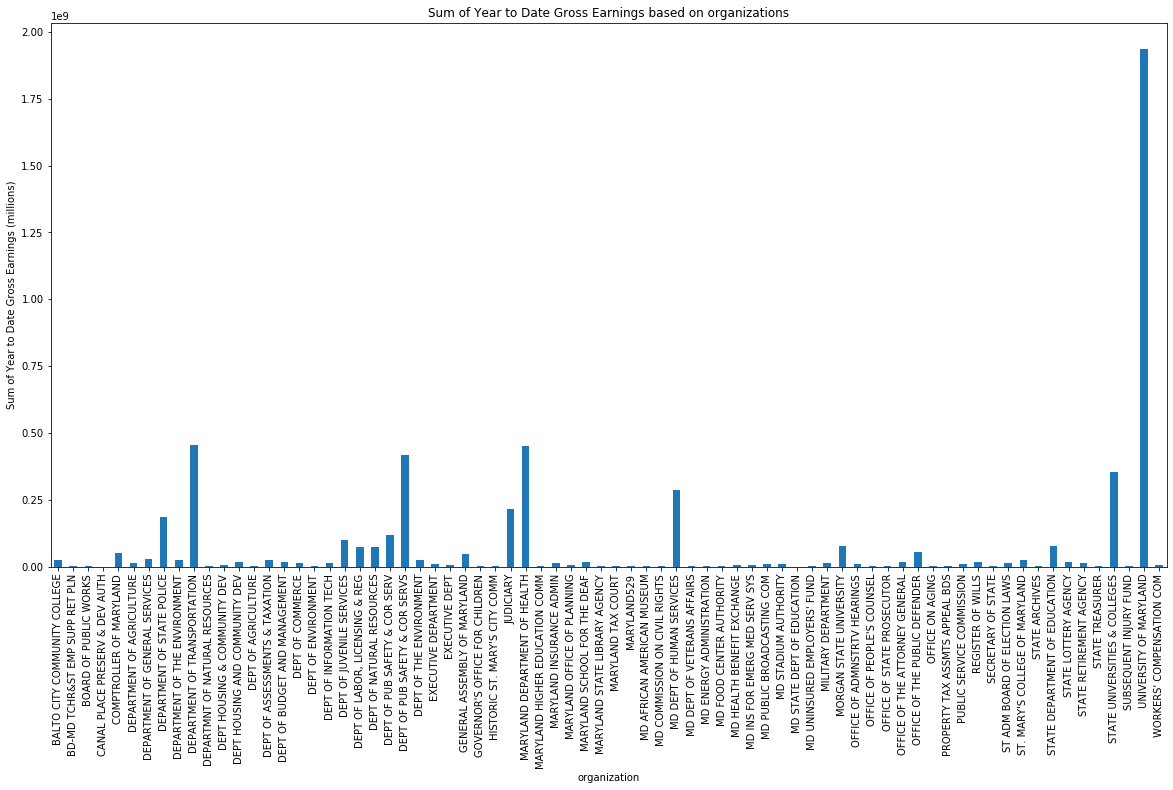

In [18]:
# first visualization showing the sum of annual salaries for each organizations
# Kept the 0s instead of switching them to NaNs because floats and strings can not be added but 0s would not affect observation
vis1 = df1.groupby('organization').ytd_gross_earnings.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('organization')
ax1.set_ylabel('Sum of Year to Date Gross Earnings (millions)')
ax1.set_title("Sum of Year to Date Gross Earnings based on organizations")

vis1.plot(kind='bar',figsize=(20,10))

This bar graph shows the sum of Year to Date Gross Earnings for each department. The University of Maryland has the highest sum of annual salaries compared to other organizations in Marylands State Government.

Visualization 2:
I visualized the percentage of employees in each organization to further the story of the data from visualization 1.
A pie chart was the best chart for percentage of an overall whole (Total number of MArylan State Employees).

https://stackoverflow.com/questions/31499033/how-do-i-plot-a-pie-chart-using-pandas-with-this-data/46904173

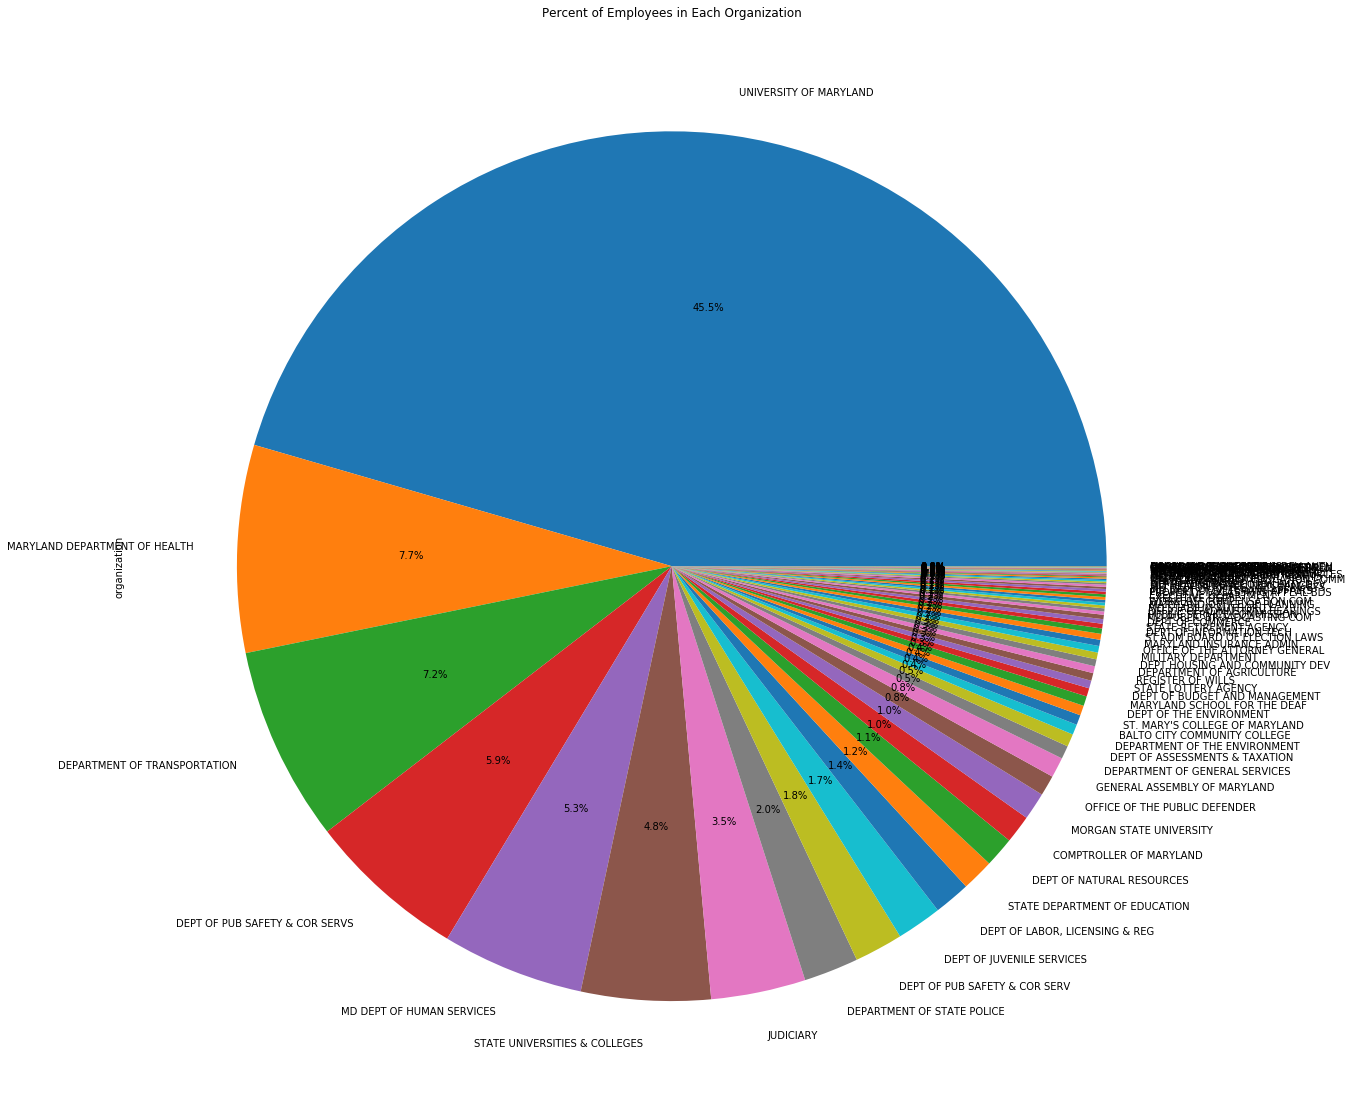

In [19]:
#2nd visualization: for the percentage of employees in the Maryland Government
df1["organization"].value_counts().plot.pie(title='Percent of Employees in Each Organization', autopct="%1.1f%%", figsize=(20, 20))
#plt.legend(labels=df["organization"], loc="lower left")


The Pie Chart shows the percentage of employees in each organization. The highest percentage is the University of Maryland. This explicitly employees in each organizations and not salaried employees. This would correlate with the story of University of Maryland having the highest sum of annual salaries of Maryland State Employees. 

Patterns: 
1. University of Maryland has the highest sum of Year to Date Gross Earnings out of all the organizations
2. The second highest sum of Year to Date Gross Earnings are the Maryland Department of Health and Department of Transportation.
3. University of Maryland has the most employees
4. The second highest number of employees of salaries is the Maryland Department of Health
5. Might be a postive correlation between the total sum of annual salaries and number of employees in an organization based visual inspection of data. Further analysis needed.

Overall Lessons:

1. I learned how to analyze and clean larger datasets.
2. I learned how to perform visualization more effectivly and how to format visualizations
3. Pie chart are one of the harder visualizations to format in Matplotlib.